In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

# Metodologia

## Criação de Instâncias

No arquivo 'instance_generator.py' foram geradas instâncias aleatórias com distribuição uniforme e salvas na pasta 'instances'. 
Foram geradas 9 instâncias para cada tamanho e capacidade, onde os tamanhos são [10, 15, 20, 25, 30, 35, 40, 45, 50] e as capacidades [100, 150, 200, 250, 300, 350, 400, 450, 500].
Nomeadas da seguinte forma 'n_capacidade_numero.txt'. Por exemplo, a instância de n = 10, capacidade = 100 de numero 1 é 10_100_1.txt.

## Criação do modelo

Foi utilizado a biblioteca 'pyomo' para modelar o problema e o solver 'glpk'. As variantes foram inseridas como argumento opcional, nomeadas pelo nome da técnica 'Strengthening' e 'Symmetry Breaking'

## Execução dos experimentos

Todas as instâncias foram executadas 4 vezes com o tempo limite de 60 segundos, para todas as combinações das variantes. A informação alvo foi o tempo de execução.

## Análise dos resultados

Foram analisadas as médias dos grupos de instâncias de mesmo tamanho e capacidade. Além disso as instâncias que excederam o tempo limite de 60 segundos foram desconsideradas

In [116]:
# Leitura dos dados
df = pd.read_csv("results.csv")
df.sort_values(by="Instance", inplace=True)
df.head(10)

,Instance,Strengthening,Symmetry Breaking,Solver Status,Execution Time
1169,10_100_1.txt,True,False,ok,0.009594
2627,10_100_1.txt,False,False,ok,0.009747
1898,10_100_1.txt,False,True,ok,0.009946
440,10_100_1.txt,True,True,ok,0.011353
2091,10_100_2.txt,False,True,ok,0.010058
1362,10_100_2.txt,True,False,ok,0.009865
633,10_100_2.txt,True,True,ok,0.010628
2820,10_100_2.txt,False,False,ok,0.009999
847,10_100_3.txt,True,False,ok,0.010045
118,10_100_3.txt,True,True,ok,0.010925


In [167]:
# Filtrando instancias por tamanho e capacidade
sizes = range(10, 55, 5)
bin_capacities = range(100, 550, 50)
instances = {
    (i, j): df[df["Instance"].str.contains(f"{i}_{j}")]
    for i in sizes
    for j in bin_capacities
}
instances[10, 100].head()

,Instance,Strengthening,Symmetry Breaking,Solver Status,Execution Time
1169,10_100_1.txt,True,False,ok,0.009594
2627,10_100_1.txt,False,False,ok,0.009747
1898,10_100_1.txt,False,True,ok,0.009946
440,10_100_1.txt,True,True,ok,0.011353
2091,10_100_2.txt,False,True,ok,0.010058


In [156]:
instances[10, 100][(instances[10, 100]["Execution Time"] < 60)].groupby(
    ["Strengthening", "Symmetry Breaking"]
)["Execution Time"].mean().reset_index()

,Strengthening,Symmetry Breaking,Execution Time
0,False,False,0.010073
1,False,True,0.041171
2,True,False,0.009859
3,True,True,0.010259


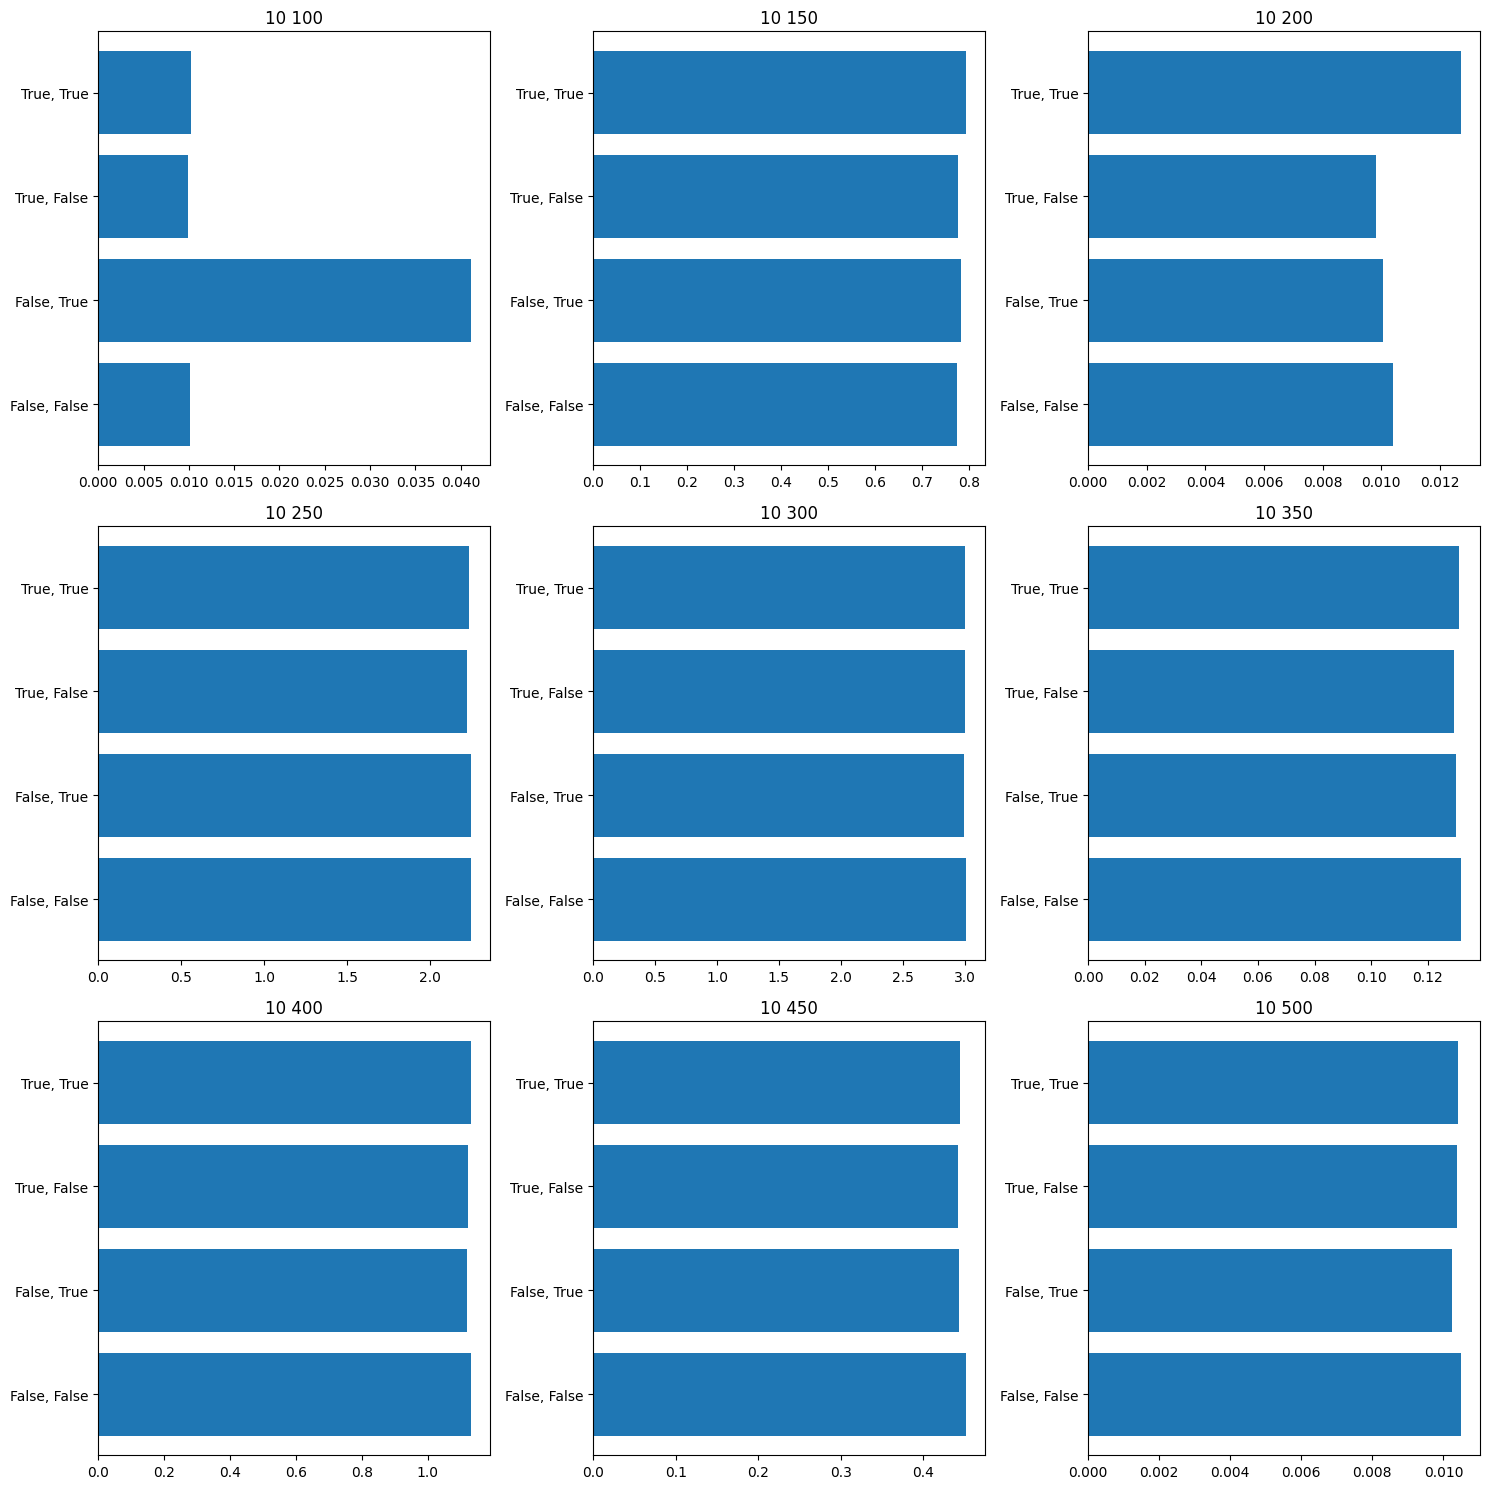

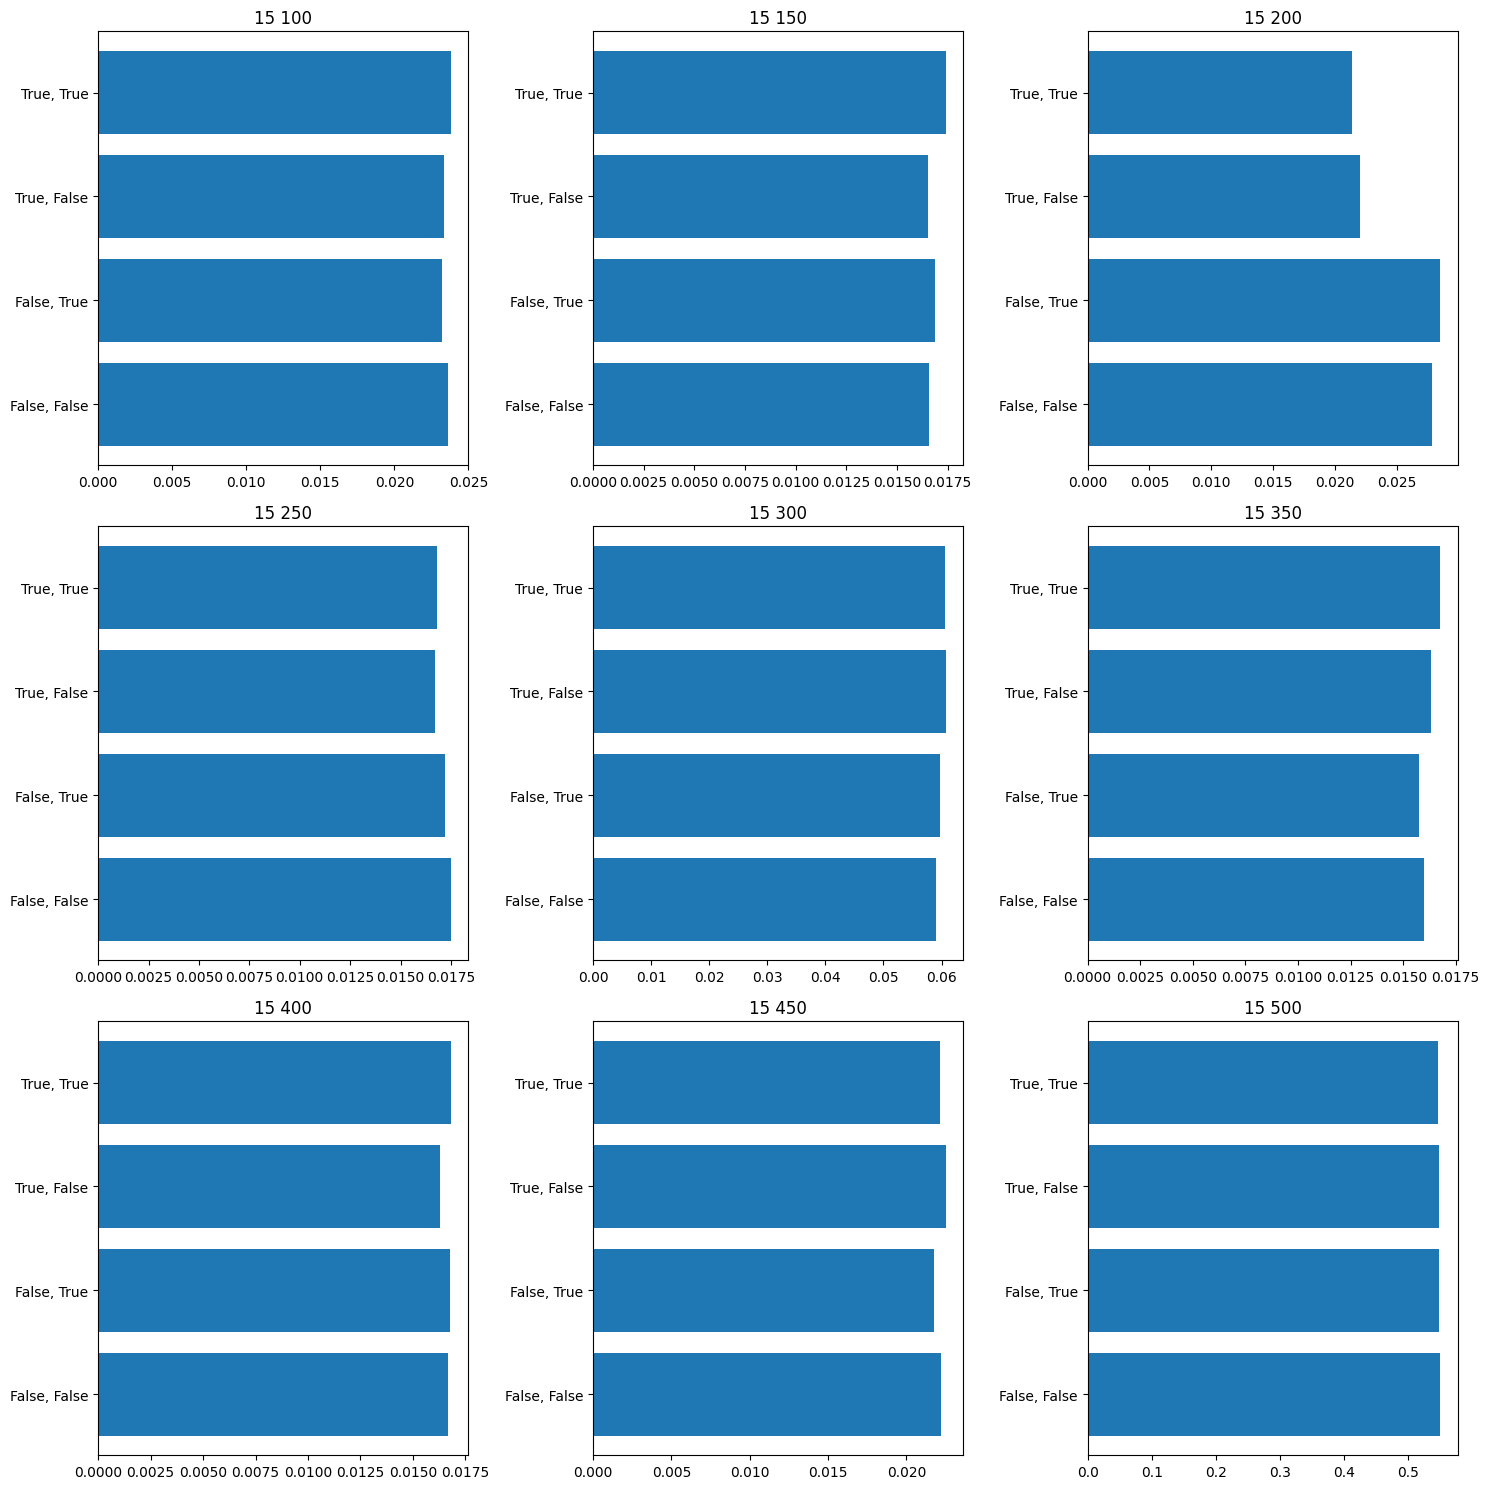

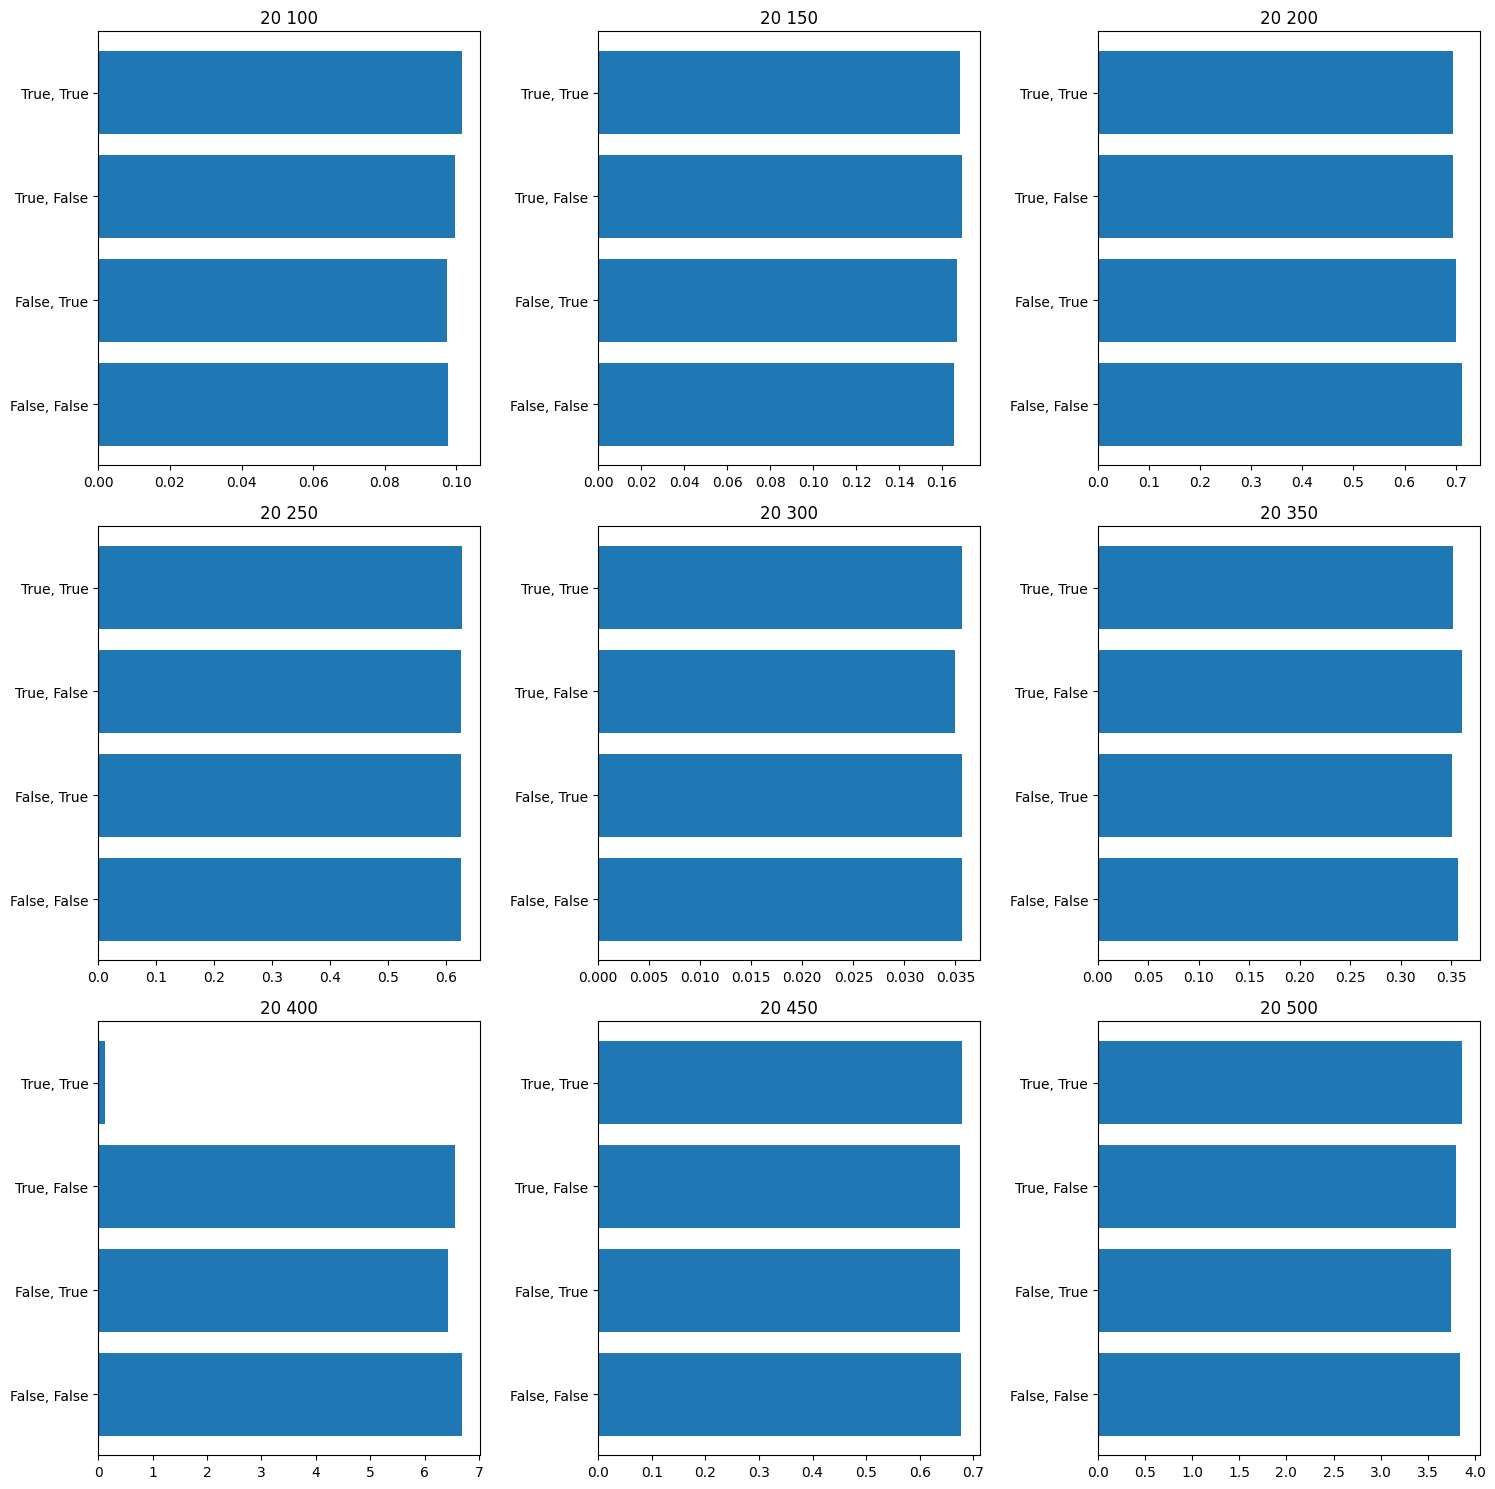

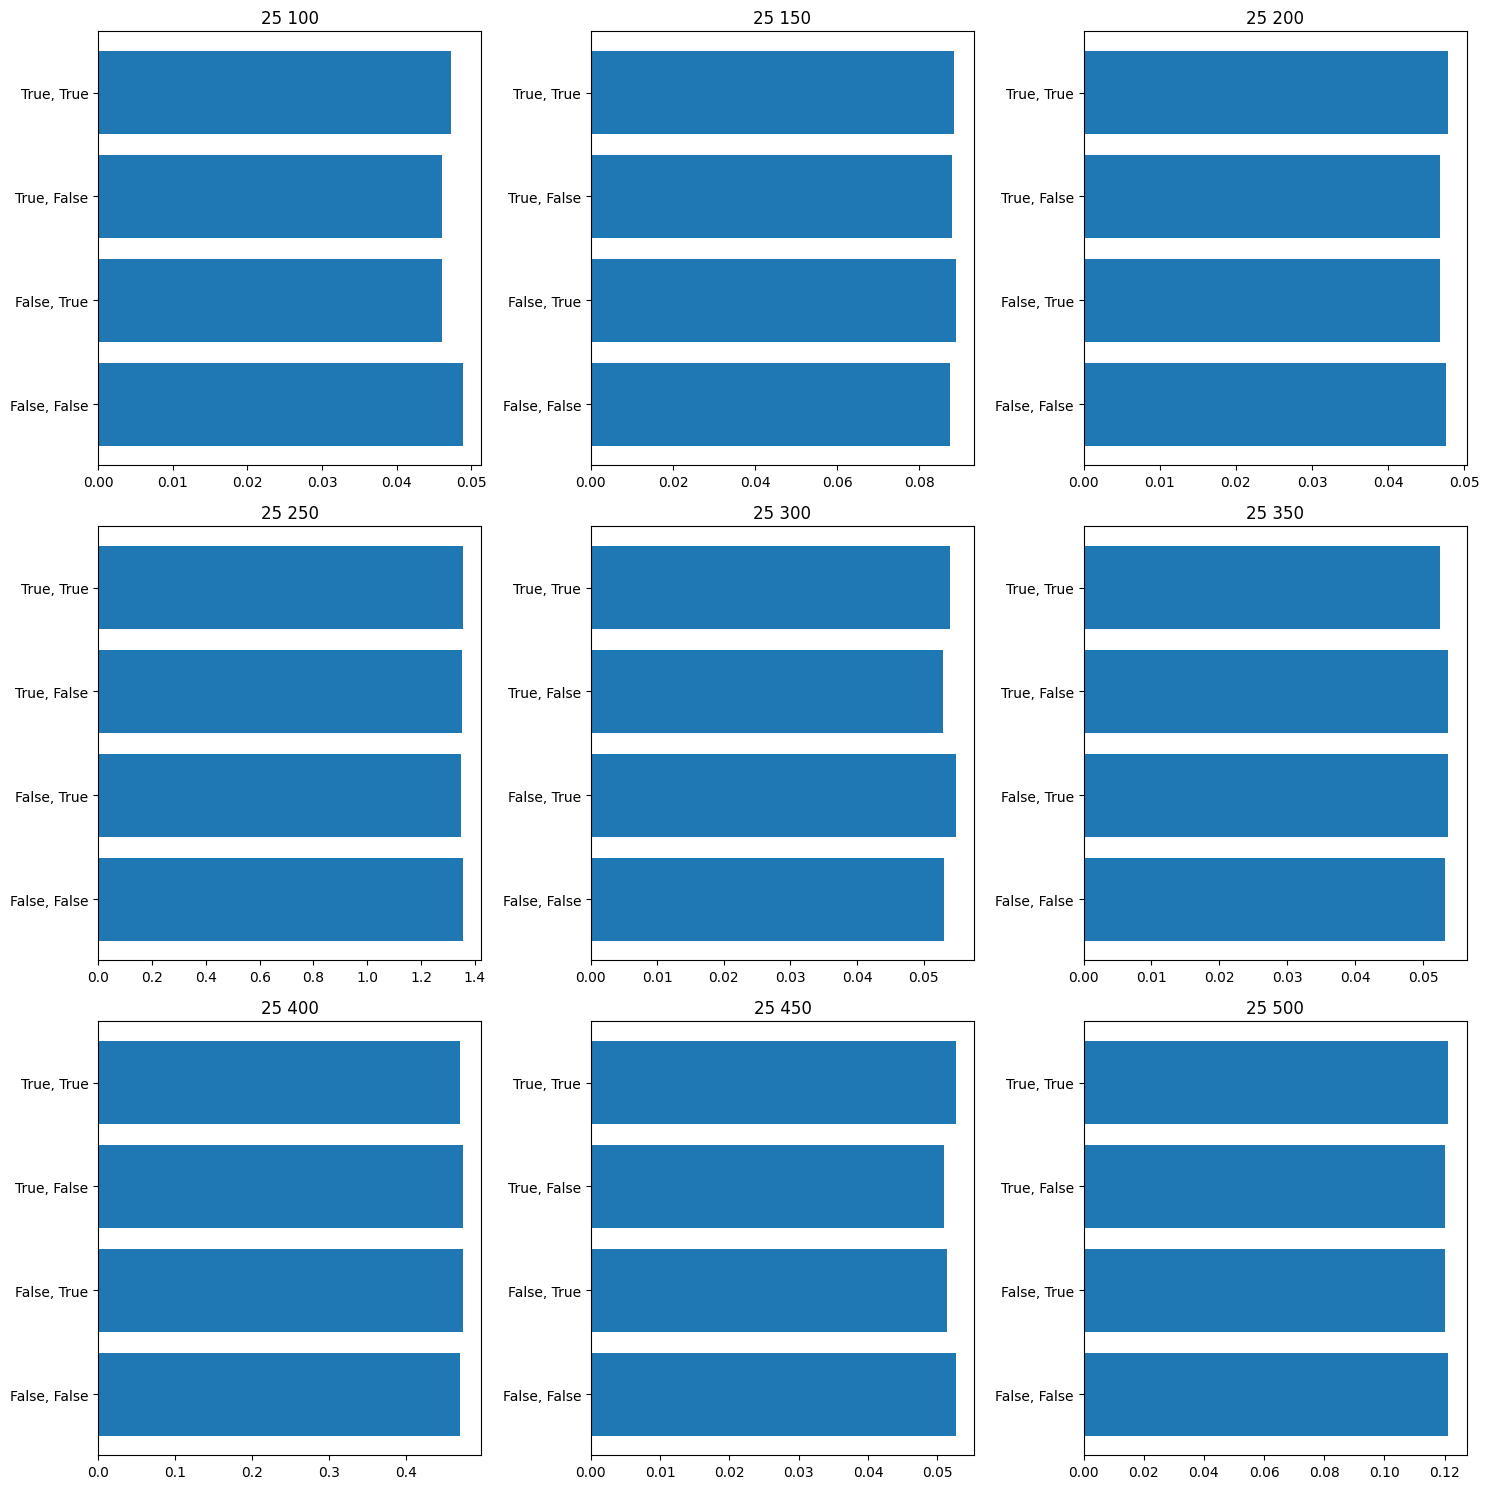

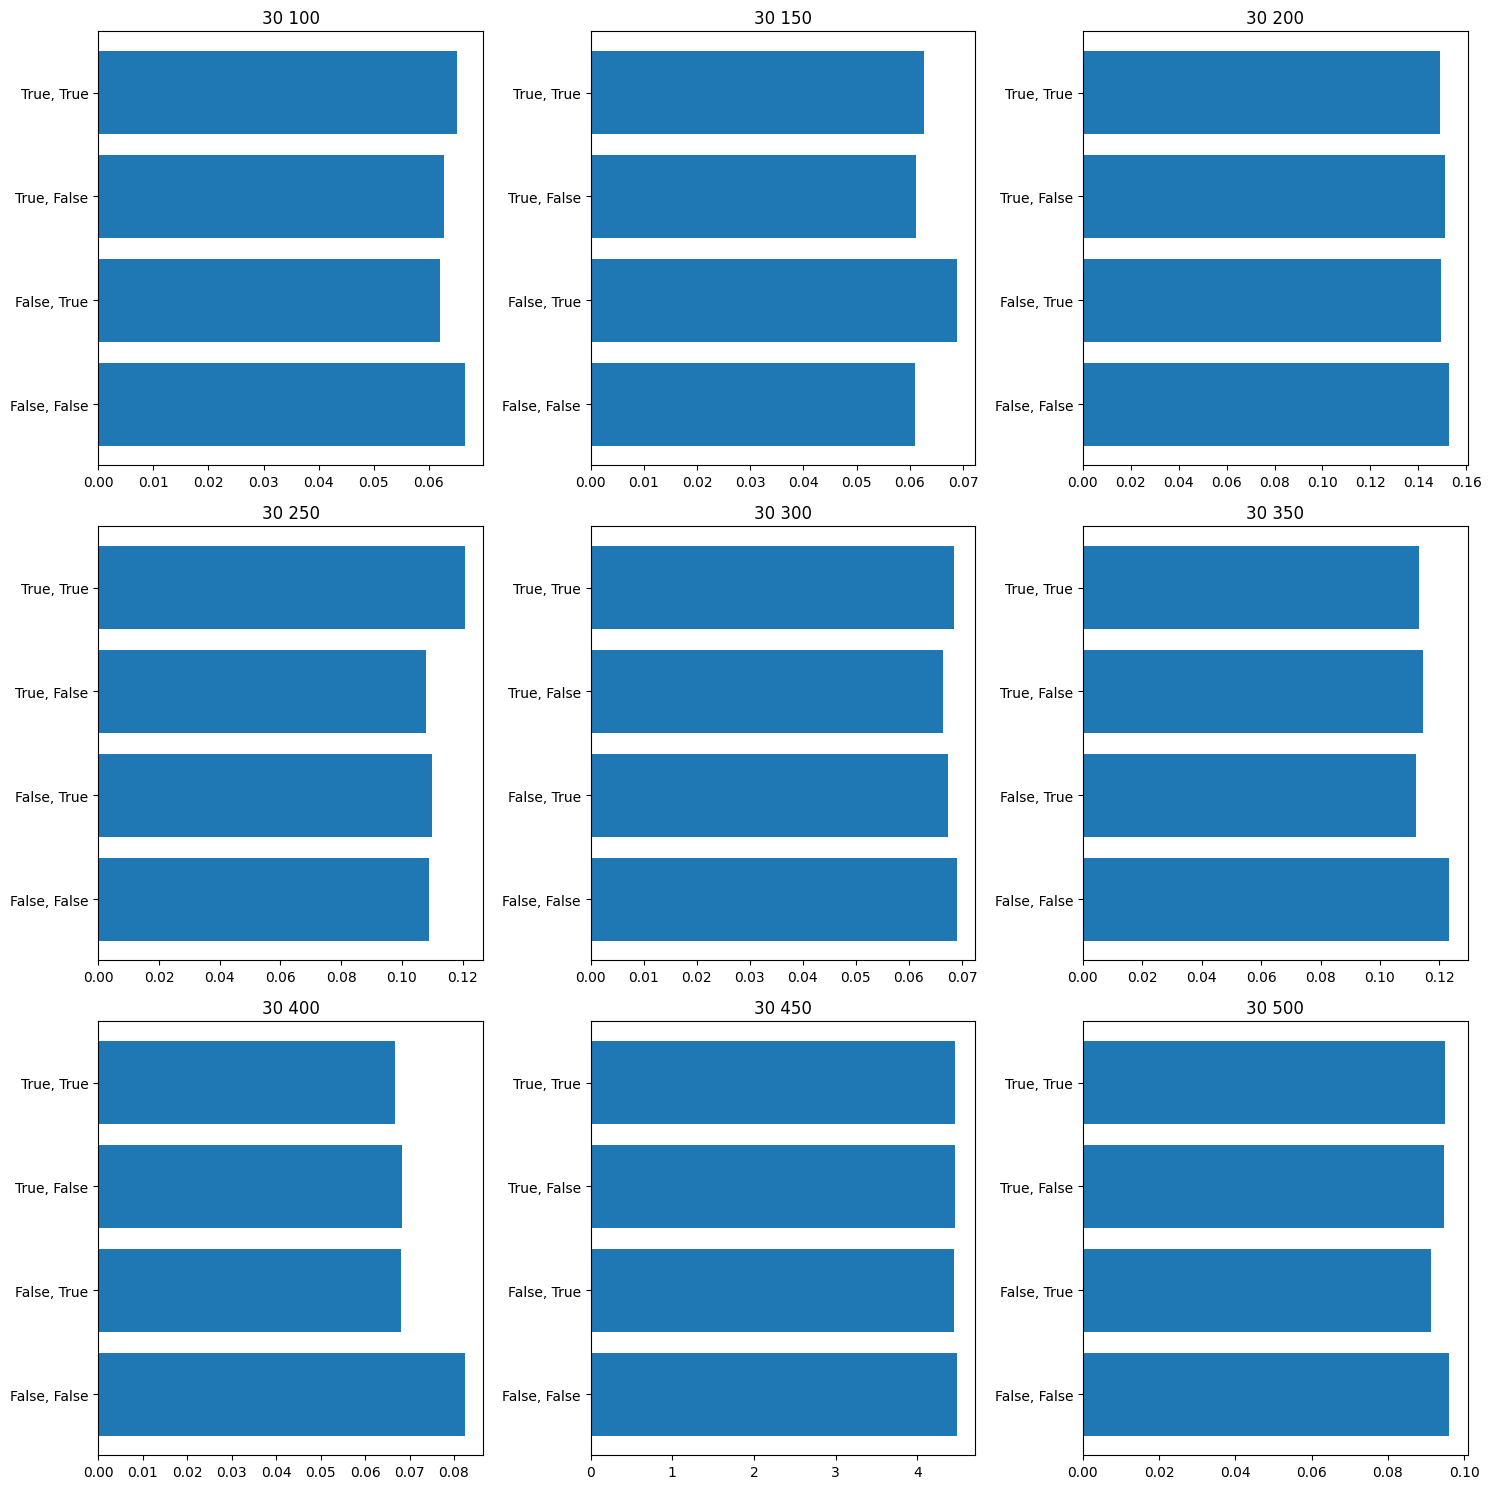

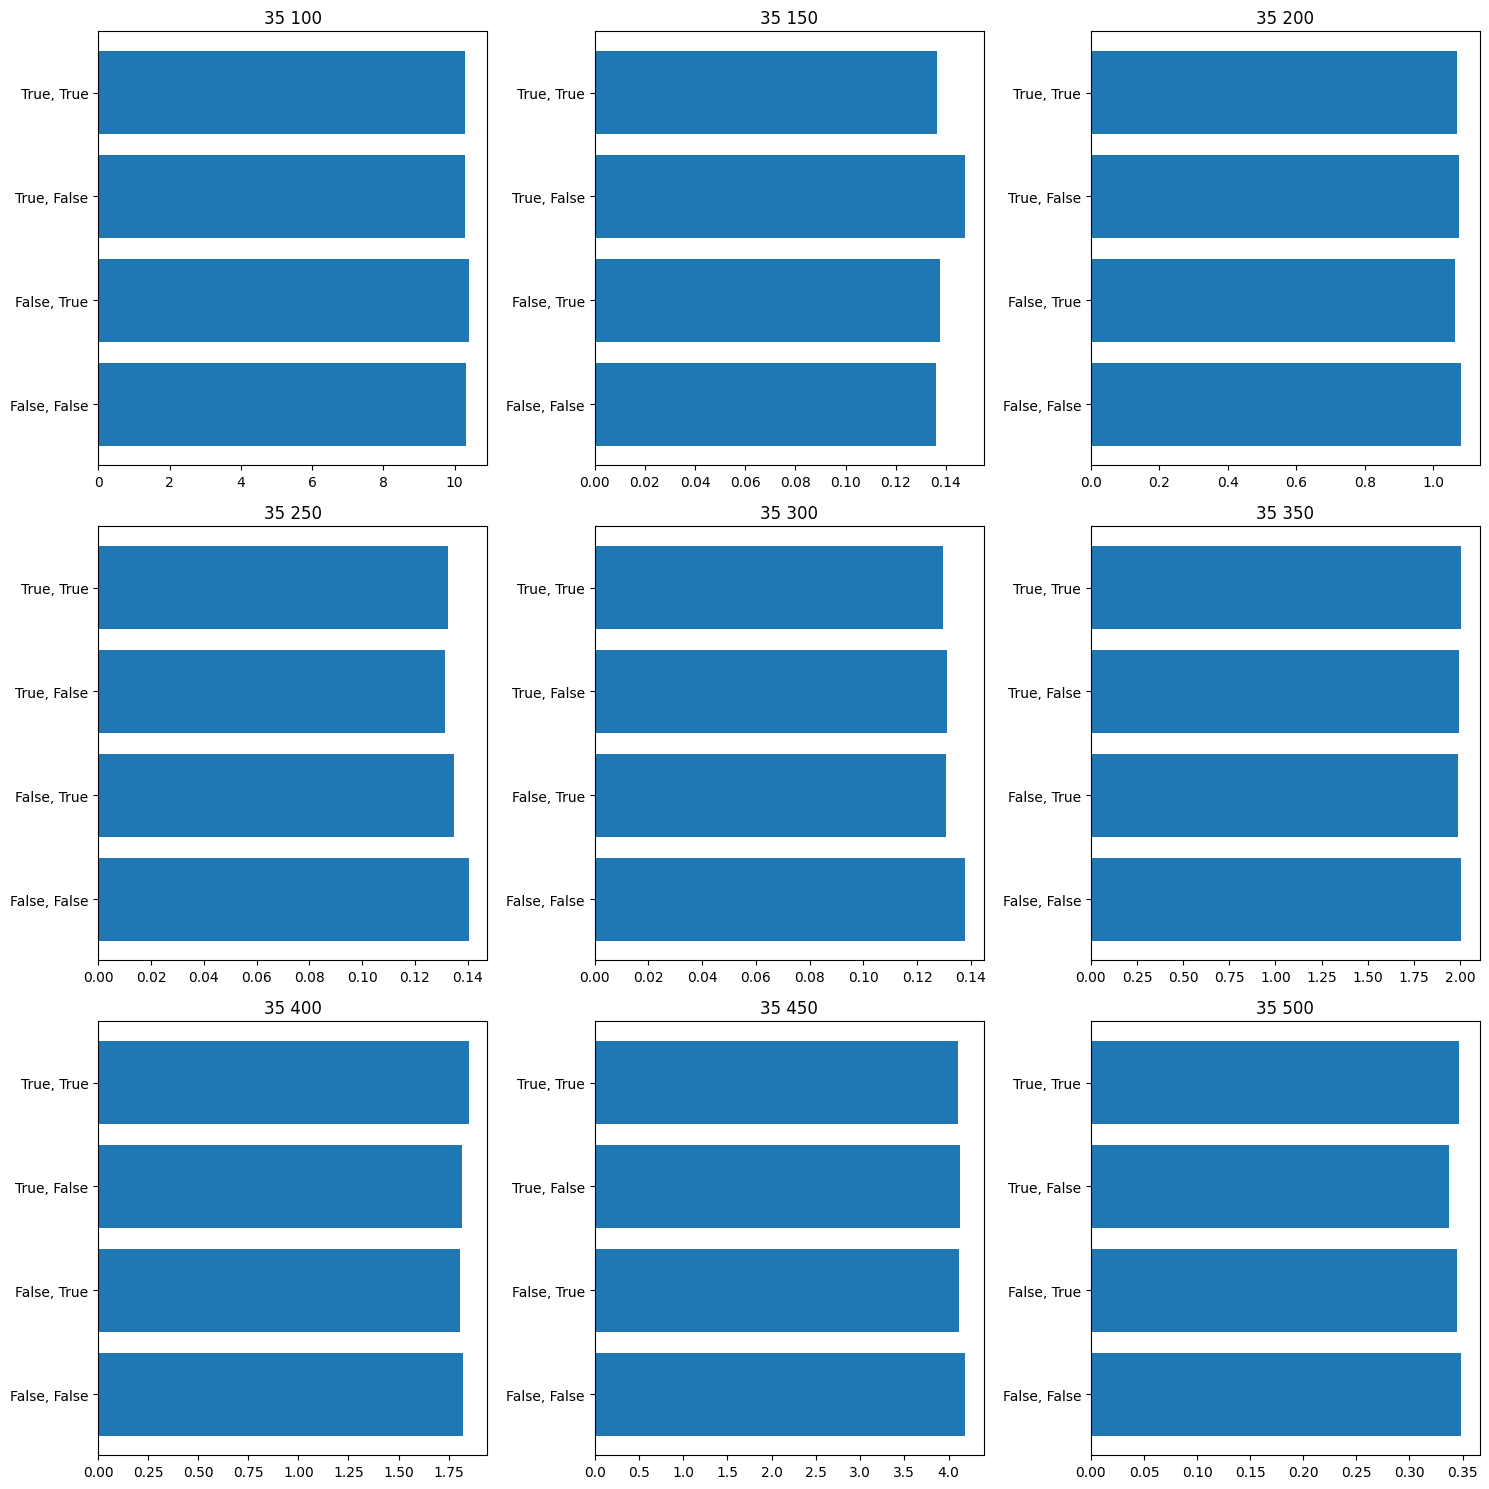

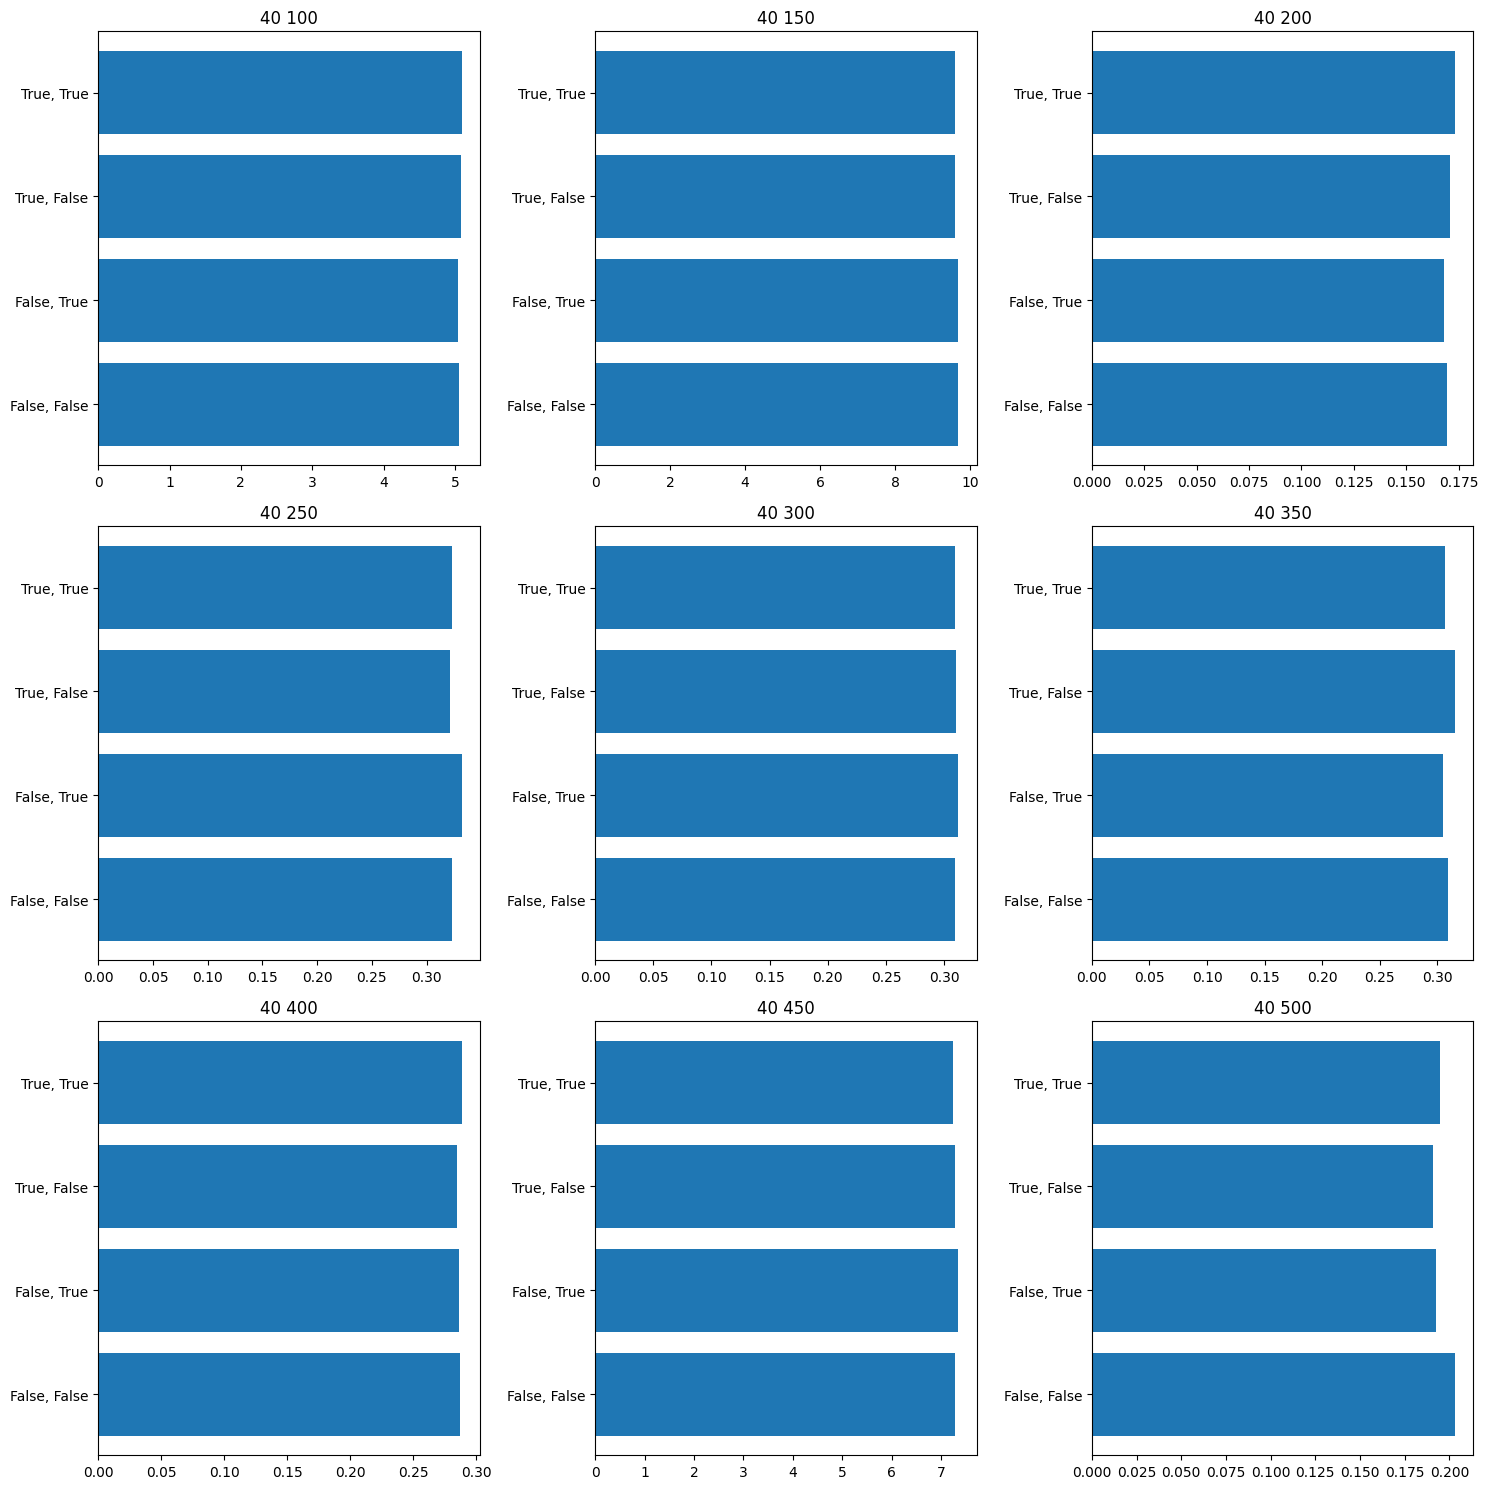

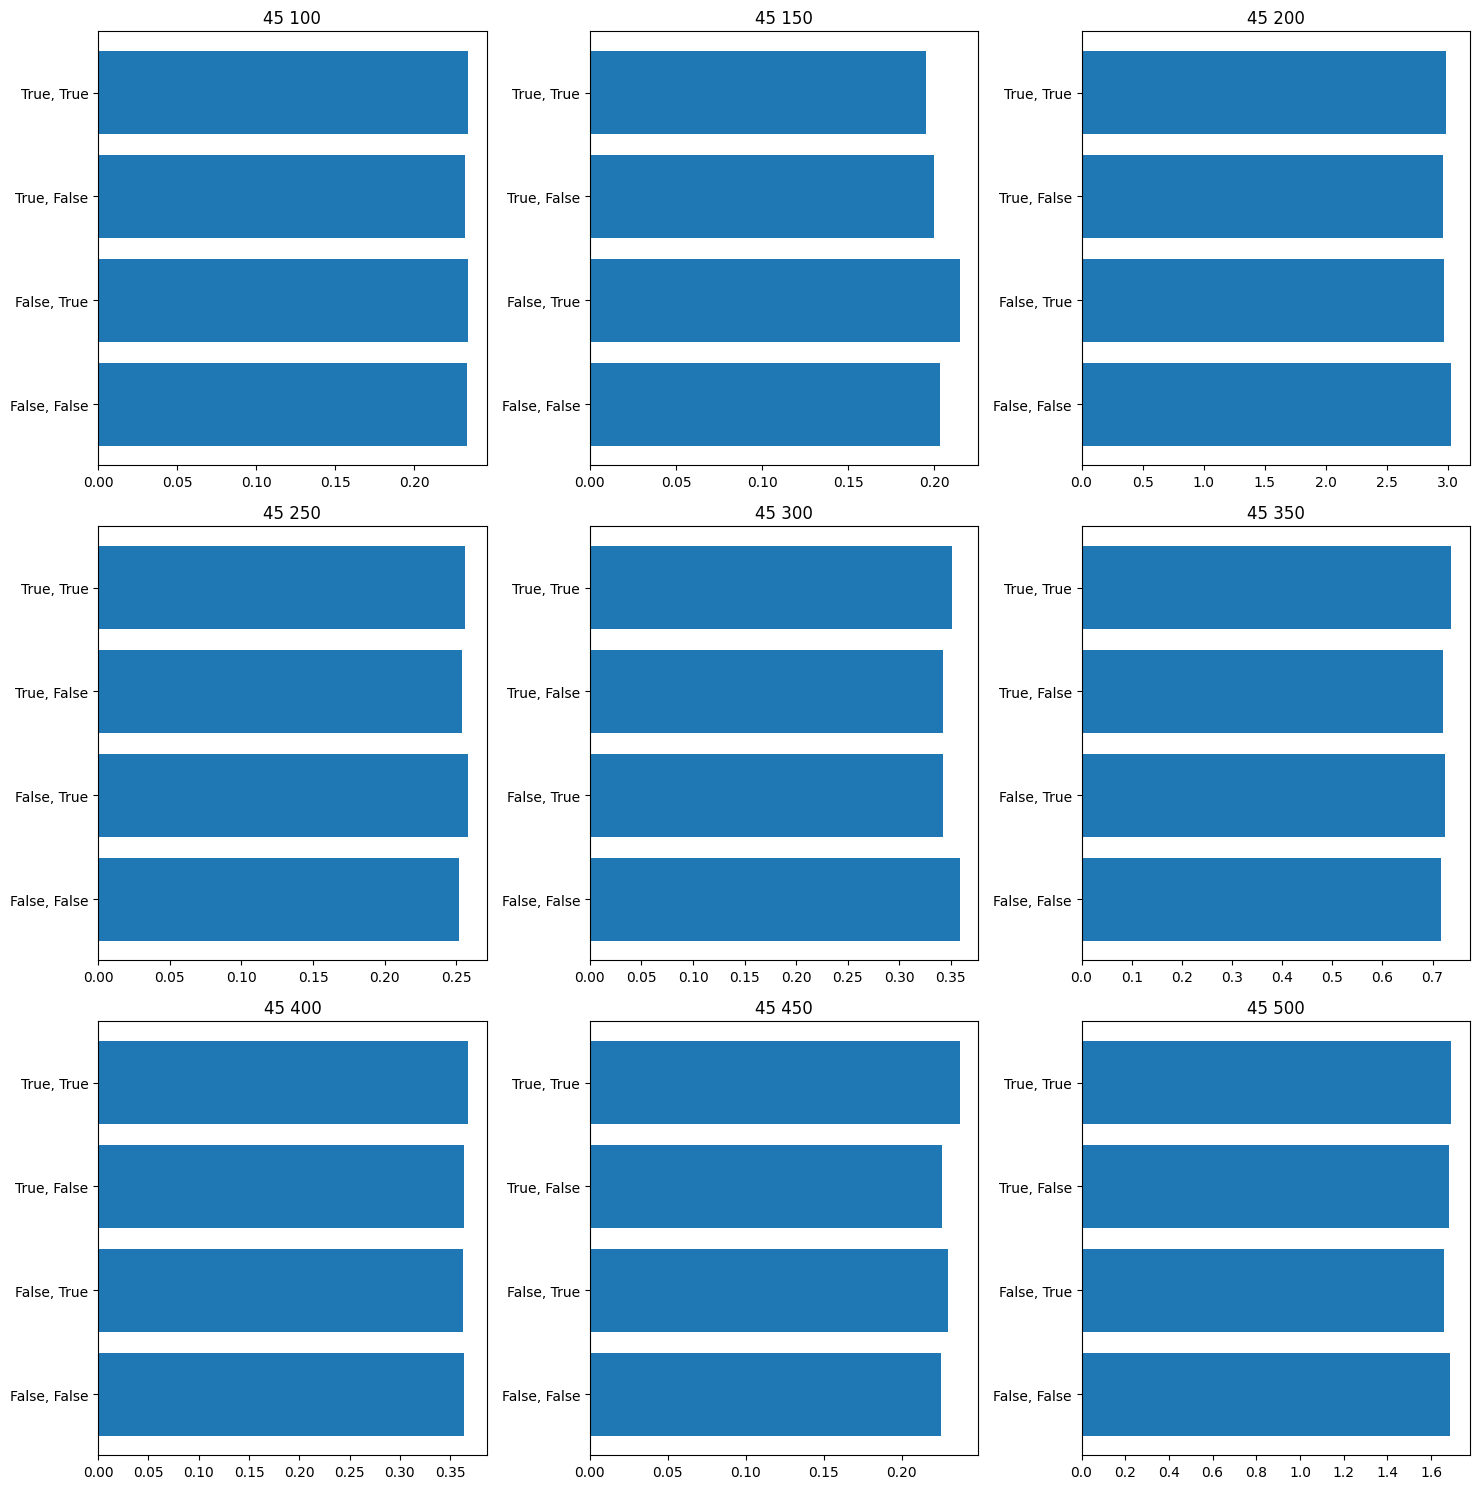

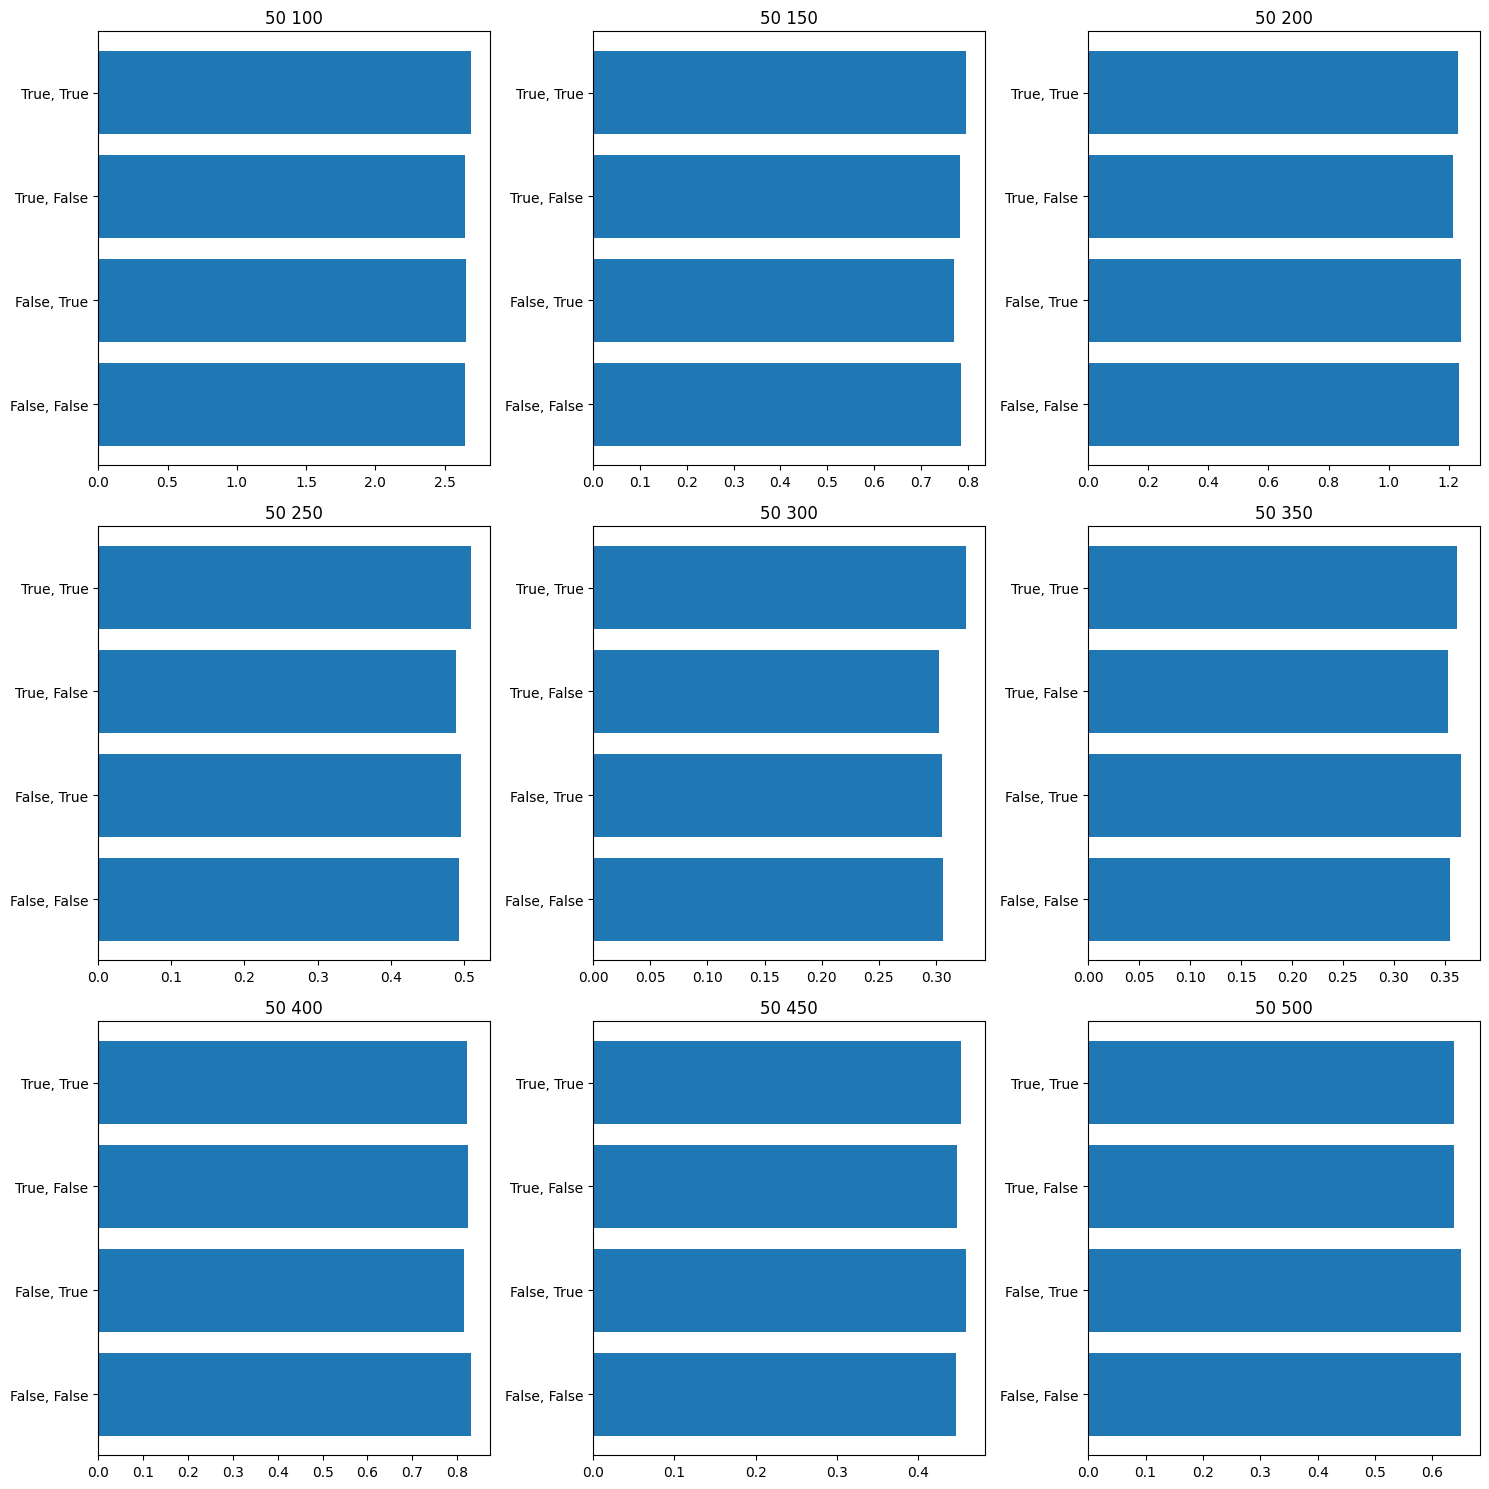

In [178]:
for size in sizes:
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    variants = ["False, False", "False, True", "True, False", "True, True"]
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    # Plotting bar charts in each subplot
    for ax, bc in zip(axes, bin_capacities):
        data = (
            instances[size, bc][(instances[size, bc]["Execution Time"] < 60)]
            .groupby(["Strengthening", "Symmetry Breaking"])["Execution Time"]
            .mean()
            .reset_index()
        )
        ax.barh(y=variants, width=data["Execution Time"])
        ax.set_title(f"{size} {bc}")
    plt.tight_layout()
    plt.savefig(f"./plots/{size}.png")
# plt.show()